# Definição do problema: Prever se um cliente irá cancelar o serviço

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv('projeto4_telecom_teste.csv')

In [4]:
dados.shape

(1667, 21)

In [5]:
dados.columns

Index(['Unnamed: 0', 'state', 'account_length', 'area_code',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [6]:
dados.sample(10)

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1267,1268,AK,121,area_code_415,no,no,0,180.0,116,30.60,...,112,16.69,280.3,95,12.61,10.1,5,2.73,2,no
1573,1574,ND,181,area_code_510,no,yes,16,196.0,85,33.32,...,119,9.10,205.9,110,9.27,9.7,1,2.62,1,no
917,918,WV,160,area_code_408,no,yes,37,179.8,104,30.57,...,115,12.31,209.1,89,9.41,11.1,8,3.00,3,no
1208,1209,LA,34,area_code_408,no,no,0,151.1,92,25.69,...,86,17.99,205.8,72,9.26,9.8,4,2.65,0,no
965,966,OR,81,area_code_415,no,yes,33,200.3,103,34.05,...,96,18.44,249.8,100,11.24,15.5,4,4.19,1,no
1296,1297,VT,217,area_code_510,no,no,0,99.7,74,16.95,...,97,15.56,220.3,73,9.91,14.4,4,3.89,0,no
1064,1065,OH,69,area_code_510,no,no,0,221.6,88,37.67,...,87,19.70,211.7,116,9.53,8.6,9,2.32,1,no
134,135,MA,72,area_code_415,no,no,0,141.9,98,24.12,...,63,15.99,115.2,49,5.18,12.0,5,3.24,2,no
1310,1311,TN,114,area_code_415,yes,no,0,200.7,72,34.12,...,79,23.05,188.2,97,8.47,13.4,7,3.62,2,yes
1125,1126,KY,53,area_code_510,no,no,0,171.5,75,29.16,...,111,19.08,187.4,84,8.43,9.7,6,2.62,1,no


In [7]:
dados.dtypes

Unnamed: 0                         int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
# Removendo a coluna que indicava index
dados.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
# Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

state                 object
area_code             object
international_plan    object
voice_mail_plan       object
churn                 object
dtype: object

In [10]:
dados.describe()
#Verifico que a maioria das variaveis náo categóricas tem uma mediana próxima da média, indicando distribuições próximas a distribuição normal

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,98.646671,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483
std,39.400755,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179
min,1.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000
50%,98.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000
75%,126.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000
max,238.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000


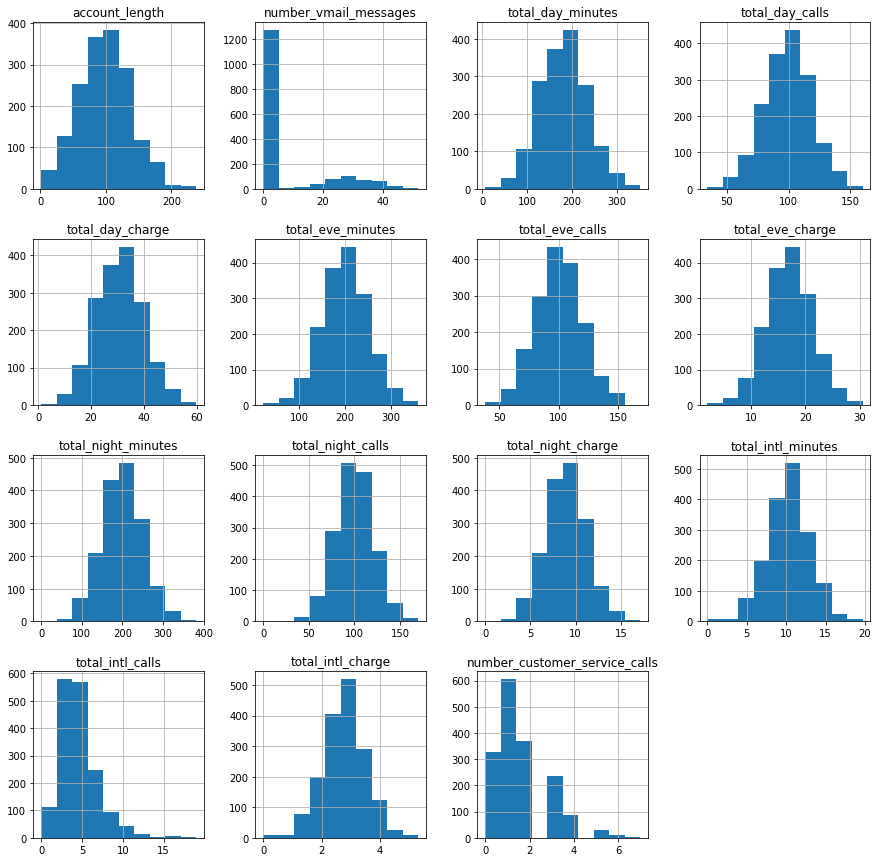

In [11]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

In [12]:
dados.describe(include = ['object'])

,state,area_code,international_plan,voice_mail_plan,churn
count,1667,1667,1667,1667,1667
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,52,840,1517,1266,1443


In [13]:
# Verificando valores ausentes
dados[dados.isnull().values]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


In [14]:
# Verificando registros duplicados (complete cases)
# Complete cases também se refere a linhas onde não há valores ausentes
dados[dados.duplicated(keep = False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


## Não há valores duplicados ou ausentes.

In [15]:
# Ajustar a variáveis para poder verificar a correlação
def ajusta_var(x):
    if x == "yes":
        return 1
    return 0
dados['churn'] = dados['churn'].map(ajusta_var)
dados['international_plan'] = dados['international_plan'].map(ajusta_var)
dados['voice_mail_plan'] = dados['voice_mail_plan'].map(ajusta_var)
dados.rename({'churn':'Target'}, axis = 'columns', inplace = True)
# Correlação entre as variáveis
dados.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Target
account_length,1.000000,-0.007291,-0.030369,-0.038609,-0.014926,0.004267,-0.014927,-0.016229,-0.011114,-0.016241,0.019004,0.001250,0.018979,-0.014783,-0.000895,-0.014848,0.004126,0.029702
international_plan,-0.007291,1.000000,0.014308,0.017560,-0.016771,0.016430,-0.016765,0.025369,-0.004875,0.025354,-0.022021,-0.008132,-0.022012,0.002167,-0.023153,0.002207,0.011684,0.257202
voice_mail_plan,-0.030369,0.014308,1.000000,0.949129,0.011802,0.015031,0.011794,0.026008,-0.004152,0.025993,0.002771,-0.004910,0.002797,0.017418,-0.042491,0.017487,-0.006298,-0.131207
number_vmail_messages,-0.038609,0.017560,0.949129,1.000000,0.016747,0.020015,0.016739,0.022495,0.000654,0.022480,-0.000367,-0.007417,-0.000348,0.003040,-0.031483,0.003116,0.006860,-0.116343
total_day_minutes,-0.014926,-0.016771,0.011802,0.016747,1.000000,-0.007162,1.000000,-0.047466,-0.008110,-0.047467,0.027850,-0.031778,0.027848,-0.039961,-0.019653,-0.039876,0.036474,0.213878
total_day_calls,0.004267,0.016430,0.015031,0.020015,-0.007162,1.000000,-0.007165,0.041946,-0.001453,0.041955,-0.040317,0.012572,-0.040303,-0.003924,0.021843,-0.003942,0.007379,0.009864
total_day_charge,-0.014927,-0.016765,0.011794,0.016739,1.000000,-0.007165,1.000000,-0.047471,-0.008107,-0.047473,0.027858,-0.031781,0.027856,-0.039969,-0.019660,-0.039884,0.036462,0.213862
total_eve_minutes,-0.016229,0.025369,0.026008,0.022495,-0.047466,0.041946,-0.047471,1.000000,0.031997,1.000000,-0.025248,0.024199,-0.025238,0.023836,0.019533,0.023977,-0.015317,0.081612
total_eve_calls,-0.011114,-0.004875,-0.004152,0.000654,-0.008110,-0.001453,-0.008107,0.031997,1.000000,0.032029,0.009887,-0.054494,0.009867,-0.041585,-0.018205,-0.041681,0.013998,-0.038537
total_eve_charge,-0.016241,0.025354,0.025993,0.022480,-0.047467,0.041955,-0.047473,1.000000,0.032029,1.000000,-0.025261,0.024185,-0.025251,0.023838,0.019547,0.023979,-0.015350,0.081613


As variações das váriaveis que terminam com **_minutes** tem alta correlação com variações **_charge** e possuem correlações 
semelhantes referente a target.Terei de utilizar apenas 1 delas.

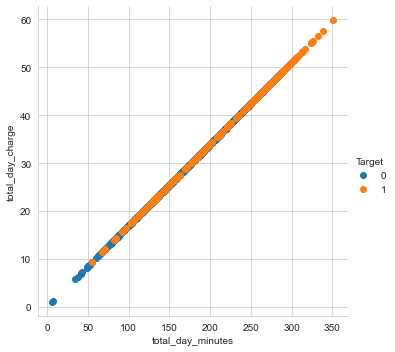

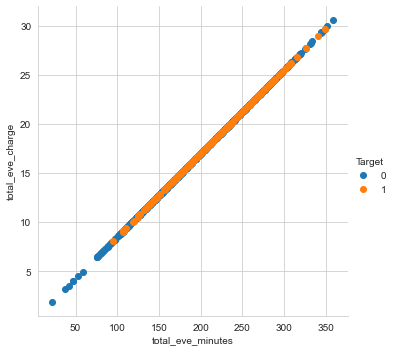

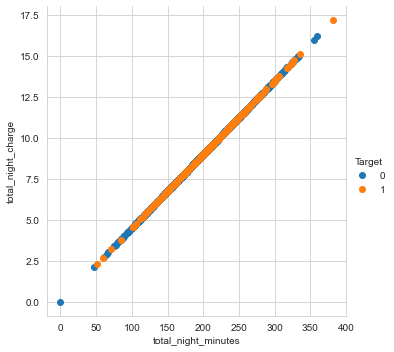

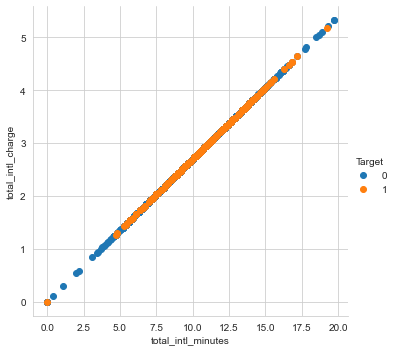

In [16]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_day_minutes', 'total_day_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_eve_minutes', 'total_eve_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_night_minutes', 'total_night_charge').add_legend()
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'total_intl_minutes', 'total_intl_charge').add_legend()

As variáveis de minutos, ligações e cobrança foram divididas por período do dia e internacional.
Suponho que a junção destas variáveis podem apresentar uma maior correlação com a target.

In [17]:
#Criando novas variaveis que somam os valores de minutos, ligacoes e cobranca da variaveis.
dados['total_minutes'] = dados['total_day_minutes'] + dados['total_eve_minutes'] +dados['total_night_minutes'] +dados['total_intl_minutes']
dados['total_calls'] = dados['total_day_calls'] + dados['total_eve_calls'] +dados['total_night_calls'] +dados['total_intl_calls']
dados['total_charge'] = dados['total_day_charge'] + dados['total_eve_charge'] +dados['total_night_charge'] +dados['total_intl_charge']

In [18]:
#Criando novas variaveis ponderadas com as correlacoes
dados['total_minutes_weighted'] = (dados['total_day_minutes']*0.213878) + (dados['total_eve_minutes']*0.081612) + (dados['total_night_minutes']*0.066204) + (dados['total_intl_minutes']*0.053308)
dados['total_calls_weighted'] = (dados['total_day_calls']*0.009864) + (dados['total_eve_calls']*-0.038537) + (dados['total_night_calls']*-0.033161) + (dados['total_intl_calls']*-0.035723)
dados['total_charge_weighted'] = (dados['total_day_charge']*0.213862) + (dados['total_eve_charge']*0.081613) + (dados['total_night_charge']*0.066187) + (dados['total_intl_charge']*0.053234)

In [19]:
dados.corr()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,Target,total_minutes,total_calls,total_charge,total_minutes_weighted,total_calls_weighted,total_charge_weighted
account_length,1.000000,-0.007291,-0.030369,-0.038609,-0.014926,0.004267,-0.014927,-0.016229,-0.011114,-0.016241,...,-0.000895,-0.014848,0.004126,0.029702,-0.007831,-0.003291,-0.017010,-0.014071,0.008337,-0.016491
international_plan,-0.007291,1.000000,0.014308,0.017560,-0.016771,0.016430,-0.016765,0.025369,-0.004875,0.025354,...,-0.023153,0.002207,0.011684,0.257202,-0.008188,-0.000097,-0.008996,-0.012840,0.014249,-0.013670
voice_mail_plan,-0.030369,0.014308,1.000000,0.949129,0.011802,0.015031,0.011794,0.026008,-0.004152,0.025993,...,-0.042491,0.017487,-0.006298,-0.131207,0.024232,0.000097,0.023469,0.020392,0.012929,0.016886
number_vmail_messages,-0.038609,0.017560,0.949129,1.000000,0.016747,0.020015,0.016739,0.022495,0.000654,0.022480,...,-0.031483,0.003116,0.006860,-0.116343,0.022940,0.004963,0.024635,0.022729,0.011027,0.020609
total_day_minutes,-0.014926,-0.016771,0.011802,0.016747,1.000000,-0.007162,1.000000,-0.047466,-0.008110,-0.047467,...,-0.019653,-0.039876,0.036474,0.213878,0.591544,-0.029493,0.875440,0.905774,0.027963,0.980769
total_day_calls,0.004267,0.016430,0.015031,0.020015,-0.007162,1.000000,-0.007165,0.041946,-0.001453,0.041955,...,0.021843,-0.003942,0.007379,0.009864,-0.003604,0.576062,0.002047,-0.003568,0.178905,-0.002743
total_day_charge,-0.014927,-0.016765,0.011794,0.016739,1.000000,-0.007165,1.000000,-0.047471,-0.008107,-0.047473,...,-0.019660,-0.039884,0.036462,0.213862,0.591545,-0.029496,0.875439,0.905774,0.027963,0.980769
total_eve_minutes,-0.016229,0.025369,0.026008,0.022495,-0.047466,0.041946,-0.047471,1.000000,0.031997,1.000000,...,0.019533,0.023977,-0.015317,0.081612,0.532855,0.058397,0.378645,0.282446,-0.034114,0.131198
total_eve_calls,-0.011114,-0.004875,-0.004152,0.000654,-0.008110,-0.001453,-0.008107,0.031997,1.000000,0.032029,...,-0.018205,-0.041681,0.013998,-0.038537,0.017938,0.541516,0.005583,0.005411,-0.708957,-0.002327
total_eve_charge,-0.016241,0.025354,0.025993,0.022480,-0.047467,0.041955,-0.047473,1.000000,0.032029,1.000000,...,0.019547,0.023979,-0.015350,0.081613,0.532846,0.058413,0.378641,0.282440,-0.034127,0.131195


A correlacao da variavel **total_charge** é maior que as outras variáveis criadas e originais, assim utilizarei apenas ela.

In [20]:
dados_featureSelection = dados.drop(dados.columns[[6,7,8,9,10,11,12,13,14,15,16,17,20,21,23,24,25]], axis=1)
dados.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_intl_calls,total_intl_charge,number_customer_service_calls,Target,total_minutes,total_calls,total_charge,total_minutes_weighted,total_calls_weighted,total_charge_weighted
114,PA,92,area_code_510,0,0,0,185.9,111,31.60,216.8,...,2,2.30,1,0,642.2,264,62.73,73.199644,-4.483821,9.072950
200,NH,79,area_code_408,0,1,30,124.8,99,21.22,207.6,...,3,1.24,1,0,512.0,339,47.99,55.465542,-7.753182,6.566185
311,MI,136,area_code_415,0,1,24,50.1,134,8.52,295.8,...,6,2.97,0,0,468.7,344,41.66,42.844113,-6.135870,4.364881


In [21]:
dados_featureSelection.sample(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
247,IL,68,area_code_415,0,0,0,2,0,49.23
297,AR,49,area_code_408,1,1,32,3,1,62.65
70,SC,84,area_code_415,0,0,0,1,0,56.10


In [22]:
dados_featureSelection.describe(include = ['object'])

,state,area_code
count,1667,1667
unique,51,3
top,WV,area_code_415
freq,52,840


In [23]:
#Irei transformar as variáveis categóricas restantes
dados_featureSelection["area_code"].unique()

array(['area_code_510', 'area_code_408', 'area_code_415'], dtype=object)

In [24]:
def ajusta_area(x):
    if x != 'area_code_510':
        if x != 'area_code_408':
            return 1
        else:
            return 2
    return 3
dados_featureSelection['area_code'] = dados_featureSelection['area_code'].map(ajusta_area)
labelencoder = LabelEncoder()
dados_featureSelection['state'] = labelencoder.fit_transform(dados_featureSelection['state'])
dados_featureSelection

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
0,11,101,3,0,0,0,3,0,43.54
1,26,137,3,0,0,0,0,0,65.63
2,35,103,2,0,1,29,1,0,87.48
3,32,99,1,0,0,0,1,0,61.77
4,40,108,1,0,0,0,2,0,55.38
...,...,...,...,...,...,...,...,...,...
1662,11,50,2,0,1,40,2,0,75.09
1663,49,152,1,0,0,0,3,1,66.72
1664,7,61,1,0,0,0,1,0,51.82
1665,7,109,3,0,0,0,0,0,59.09


In [25]:
dados_featureSelection.corr()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
state,1.000000,0.023352,0.013230,0.032175,-0.027523,-0.026991,0.013527,0.004967,0.020336
account_length,0.023352,1.000000,-0.007784,-0.007291,-0.030369,-0.038609,0.004126,0.029702,-0.017010
area_code,0.013230,-0.007784,1.000000,-0.002410,-0.006129,0.000683,0.036783,0.015613,-0.032852
international_plan,0.032175,-0.007291,-0.002410,1.000000,0.014308,0.017560,0.011684,0.257202,-0.008996
voice_mail_plan,-0.027523,-0.030369,-0.006129,0.014308,1.000000,0.949129,-0.006298,-0.131207,0.023469
number_vmail_messages,-0.026991,-0.038609,0.000683,0.017560,0.949129,1.000000,0.006860,-0.116343,0.024635
number_customer_service_calls,0.013527,0.004126,0.036783,0.011684,-0.006298,0.006860,1.000000,0.221062,0.023211
Target,0.004967,0.029702,0.015613,0.257202,-0.131207,-0.116343,0.221062,1.000000,0.244305
total_charge,0.020336,-0.017010,-0.032852,-0.008996,0.023469,0.024635,0.023211,0.244305,1.000000


In [26]:
# Cria um objeto separado para a variável target
y = dados_featureSelection.Target
# Cria um objeto separadado para as variáveis de entrada
X = dados_featureSelection.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_featureSelection.Target)
#Verificando o balanceamento da Classe target
y_treino.value_counts()

0    1082
1     168
Name: Target, dtype: int64

In [27]:
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X_treino, y_treino = over_sampler.fit_resample(X_treino, y_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

# Criação de modelos

### LogisticRegression

In [28]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}
# Criando o modelo com GridSearch 
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'accuracy', 
                         n_jobs = -1)
# Treinamento do modelo
modelo_v1.fit(X_treino, y_treino)
# Selecionamos o melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=10)

In [29]:
# Construindo o modelo novamente com os melhores hiperparâmetros
# Isso é necessário pois a versão final não deve ter o GridSearchCV
modelo_v1 = LogisticRegression(C = 10)
modelo_v1.fit(X_treino, y_treino)
# Obtemos os coeficientes pelo maior maior usando np.argsort
indices = np.argsort(-abs(modelo_v1.coef_[0,:]))
print("Variáveis mais importantes para o resultado do modelo_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v1:
--------------------------------------------------
voice_mail_plan
total_charge
number_customer_service_calls
number_vmail_messages
international_plan
area_code
account_length
state


In [30]:
# Previsões
y_pred_v1 = modelo_v1.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
# Calcula AUC score
auc_v1 = auc(fpr_v1, tpr_v1)
# Calcula acurácia
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística',
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v1, ignore_index = True)

### RandomForest

In [31]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
# Treina o modelo
modelo_v2.fit(X_treino, y_treino)
# Extrai o melhor modelo
modelo_v2.best_estimator_

RandomForestClassifier(n_estimators=500)

In [32]:
# Recria o modelo com os melhores hiperparâmetros
modelo_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 5)
modelo_v2.fit(X_treino, y_treino)
# Variáveis mais relevantes
indices = np.argsort(-modelo_v2.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v2:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v2:
--------------------------------------------------
total_charge
account_length
state
number_customer_service_calls
area_code
number_vmail_messages
international_plan
voice_mail_plan


In [33]:
# Previsões
y_pred_v2 = modelo_v2.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v2, tpr_v2, thresholds = roc_curve(y_teste, y_pred_proba_v2)
# Calcula AUC score
auc_v2 = auc(fpr_v2, tpr_v2)
# Calcula acurácia
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {'Nome': 'modelo_v2', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2,
                  'Acurácia': acuracia_v2}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v2, ignore_index = True)

### KNN

In [34]:
# Lista de possíveis valores de K
vizinhos = list(range(1, 20, 2))
# Lista para os scores
cv_scores = []
# Validação cruzada para determinar o melhor valor de k
for k in vizinhos:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_treino, y_treino, cv = 5, scoring = 'roc_auc')
    cv_scores.append(scores.mean())   
# Ajustando o erro de classificação
erro = [1 - x for x in cv_scores]
# Determinando o melhor valor de k (com menor erro)
optimal_k = vizinhos[erro.index(min(erro))]
print('O valor ideal de k é %d' % optimal_k)

O valor ideal de k é 5


In [35]:
# Criamos o modelo versão 3
modelo_v3 = KNeighborsClassifier(n_neighbors = optimal_k)
# Treinamento
modelo_v3.fit(X_treino, y_treino)
# Previsões
y_pred_v3 = modelo_v3.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v3 = modelo_v3.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v3, tpr_v3, thresholds = roc_curve(y_teste, y_pred_proba_v3)
# Calcula AUC score
auc_v3 = auc(fpr_v3, tpr_v3)
# Calcula acurácia
acuracia_v3 = accuracy_score(y_teste, y_pred_v3)
# Dicionário com as métricas do modelo_v3
dict_modelo_v3 = {'Nome': 'modelo_v3', 
                  'Algoritmo': 'KNN',
                  'AUC Score': auc_v3,
                  'Acurácia': acuracia_v3}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v3, ignore_index = True)

### DecisionTree

In [36]:
# Hiperparâmetros
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
# Cria o modelo com RandomizedSearchCV
modelo_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
# Treinamento
modelo_v4.fit(X_treino, y_treino)
# Melhor modelo
modelo_v4.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=3)

In [37]:
# Recriando o modelo
modelo_v4 = DecisionTreeClassifier(min_samples_split = 4, max_depth = 6, min_samples_leaf=4)
modelo_v4.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v4.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v4:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v4:
--------------------------------------------------
total_charge
number_customer_service_calls
international_plan
account_length
voice_mail_plan
area_code
state
number_vmail_messages


In [38]:
# Previsões de classe
y_pred_v4 = modelo_v4.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v4 = modelo_v4.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v4, tpr_v4, thresholds = roc_curve(y_teste, y_pred_proba_v4)
# Calcula AUC score
auc_v4 = auc(fpr_v4, tpr_v4)
# Calcula acurácia
acuracia_v4 = accuracy_score(y_teste, y_pred_v4)
# Dicionário com as métricas do modelo_v4
dict_modelo_v4 = {'Nome': 'modelo_v4', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4,
                  'Acurácia': acuracia_v4}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v4, ignore_index = True)

### SVC

In [39]:
# Função para seleção de hiperparâmetros
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = nfolds)
    grid_search.fit(X_treino, y_treino)
    grid_search.best_params_
    return grid_search.best_params_
# Aplica a função
svc_param_selection(X_treino, y_treino, 5)

{'C': 10, 'gamma': 1}

In [40]:
# Cria o modelo com os melhores hiperparâmetros
modelo_v5 = SVC(C = 10, gamma = 1, probability = True)
# Treinamento
modelo_v5.fit(X_treino, y_treino)
# Previsões de classe
y_pred_v5 = modelo_v5.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v5 = modelo_v5.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v5, tpr_v5, thresholds = roc_curve(y_teste, y_pred_proba_v5)
# Calcula AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
# Calcula acurácia
acuracia_v5 = accuracy_score(y_teste, y_pred_v5)
# Dicionário com as métricas do modelo_v5
dict_modelo_v5 = {'Nome': 'modelo_v5', 
                  'Algoritmo': 'SVM',
                  'AUC Score': auc_v5,
                  'Acurácia': acuracia_v5}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v5, ignore_index = True)

### XGBoost

In [41]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X_treino,y_treino)
# Define random search
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_treino, y_treino)
# Print the best score and the corresponding hyperparameters
print(f'The best score is {random_result.best_score_:.4f}')
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 0.9715
The best hyperparameters are {'reg_lambda': 0.01, 'reg_alpha': 1e-05, 'max_depth': 18, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}


In [42]:
# Recriando o modelo
modelo_v6 = XGBClassifier(reg_lambda = 0.1, reg_alpha = 0.1,max_depth = 18,learning_rate = 0.1,gamma = 0.3,colsample_bytree = 0.7)
modelo_v6.fit(X_treino, y_treino)
# Variáveis mais importantes
indices = np.argsort(-modelo_v6.feature_importances_)
print("Variáveis mais importantes para o resultado do modelo_v6:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Variáveis mais importantes para o resultado do modelo_v6:
--------------------------------------------------
voice_mail_plan
international_plan
total_charge
number_customer_service_calls
area_code
number_vmail_messages
account_length
state


In [43]:
# Previsões de classe
y_pred_v6 = modelo_v6.predict(X_teste)
# Previsões de probabilidade
y_pred_proba_v6 = modelo_v6.predict_proba(X_teste)[:, 1]
# Calcula curva ROC
fpr_v6, tpr_v6, thresholds = roc_curve(y_teste, y_pred_proba_v6)
# Calcula AUC score
auc_v6 = auc(fpr_v6, tpr_v6)
# Calcula acurácia
acuracia_v6 = accuracy_score(y_teste, y_pred_v6)
# Dicionário com as métricas do modelo_v6
dict_modelo_v6 = {'Nome': 'modelo_v6', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6,
                  'Acurácia': acuracia_v6}
# Adiciona o dict ao dataframe
df_modelos = df_modelos.append(dict_modelo_v6, ignore_index = True)
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.799713,0.748201
1,modelo_v2,Random Forest,0.921399,0.937650
2,modelo_v3,KNN,0.859690,0.820144
3,modelo_v4,Decision Tree,0.928942,0.913669
4,modelo_v5,SVM,0.826128,0.860911
5,modelo_v6,XGBoost,0.902948,0.913669


### Seguirei tentando otimizar os modelos que tiver AUC superior a 0.9

Suponho que removendo as variáveis **state** e **area_code** a performance dos modelos aumente, pois as mesmas foram indicadas como pouco importantes para os resultados de 2 dos 3 melhores algoritmos.

In [44]:
dados_otimiza = dados_featureSelection.drop(dados.columns[[0,2]], axis=1)
dados_otimiza.sample(3)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Target,total_charge
984,77,0,0,0,0,0,61.75
433,173,0,0,0,1,0,42.95
1171,123,0,0,0,1,0,47.04


In [45]:
# Cria um objeto separado para a variável target
y = dados_otimiza.Target
# Cria um objeto separadado para as variáveis de entrada
X = dados_otimiza.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_otimiza.Target)
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X_treino, y_treino = over_sampler.fit_resample(X_treino, y_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino = scaler.transform(X_treino)
X_teste = scaler.transform(X_teste)

## Criando novas versões do Modelo

### Otimizando RandomForest

In [46]:
tuned_params_v2_1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_1 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_1.fit(X_treino, y_treino)
modelo_v2_1.best_estimator_

RandomForestClassifier()

In [47]:
modelo_v2_1 = RandomForestClassifier(n_estimators = 300)
modelo_v2_1.fit(X_treino, y_treino)
y_pred_v2_1 = modelo_v2_1.predict(X_teste)
y_pred_proba_v2_1 = modelo_v2_1.predict_proba(X_teste)[:, 1]
fpr_v2_1, tpr_v2_1, thresholds = roc_curve(y_teste, y_pred_proba_v2_1)
auc_v2_1 = auc(fpr_v2_1, tpr_v2_1)
acuracia_v2_1 = accuracy_score(y_teste, y_pred_v2_1)
dict_modelo_v2_1 = {'Nome': 'modelo_v2_1', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_1,
                  'Acurácia': acuracia_v2_1}
df_modelos = df_modelos.append(dict_modelo_v2_1, ignore_index = True)

### Otimizando DecisionTree

In [48]:
tuned_params_v4_1 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_1 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_1.fit(X_treino, y_treino)
modelo_v4_1.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6)

In [49]:
modelo_v4_1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=3)
modelo_v4_1.fit(X_treino, y_treino)
y_pred_v4_1 = modelo_v4_1.predict(X_teste)
y_pred_proba_v4_1 = modelo_v4_1.predict_proba(X_teste)[:, 1]
fpr_v4_1, tpr_v4_1, thresholds = roc_curve(y_teste, y_pred_proba_v4_1)
auc_v4_1 = auc(fpr_v4_1, tpr_v4_1)
acuracia_v4_1 = accuracy_score(y_teste, y_pred_v4_1)
dict_modelo_v4_1 = {'Nome': 'modelo_v4_1', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_1,
                  'Acurácia': acuracia_v4_1}
df_modelos = df_modelos.append(dict_modelo_v4_1, ignore_index = True)

### Otimizando XGBoost

In [50]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X_treino,y_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X_treino, y_treino)
#print(f'The best hyperparameters are {random_result.best_params_}')
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
modelo_v6_1 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_1.fit(X_treino, y_treino)
y_pred_v6_1 = modelo_v6_1.predict(X_teste)
y_pred_proba_v6_1 = modelo_v6_1.predict_proba(X_teste)[:, 1]
fpr_v6_1, tpr_v6_1, thresholds = roc_curve(y_teste, y_pred_proba_v6_1)
auc_v6_1 = auc(fpr_v6_1, tpr_v6_1)
acuracia_v6_1 = accuracy_score(y_teste, y_pred_v6_1)
dict_modelo_v6_1 = {'Nome': 'modelo_v6_1', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_1,
                  'Acurácia': acuracia_v6_1}
df_modelos = df_modelos.append(dict_modelo_v6_1, ignore_index = True)

In [52]:
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.799713,0.748201
1,modelo_v2,Random Forest,0.921399,0.937650
2,modelo_v3,KNN,0.859690,0.820144
3,modelo_v4,Decision Tree,0.928942,0.913669
4,modelo_v5,SVM,0.826128,0.860911
5,modelo_v6,XGBoost,0.902948,0.913669
6,modelo_v2_1,Random Forest,0.912075,0.908873
7,modelo_v4_1,Decision Tree,0.888776,0.920863
8,modelo_v6_1,XGBoost,0.895479,0.889688


Os novos modelos tiveram performance inferior aos originais, então com outras transformações com os dados anteriores.

## Tratamento de outliers

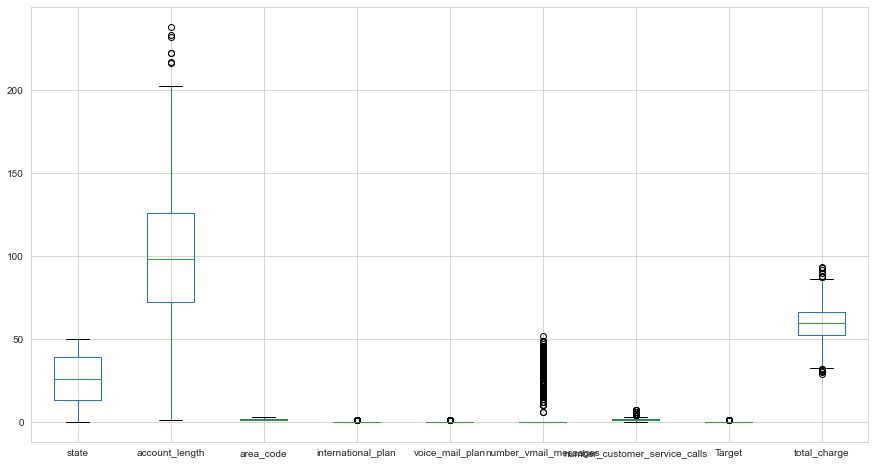

In [53]:
# plotar um boxplot para analisar presença de outliers no dataset
colunas = dados_featureSelection.columns.to_list()
plt.figure(figsize=(15,8))
dados_featureSelection.boxplot(column = colunas[:])
plt.show()

<AxesSubplot:xlabel='account_length'>

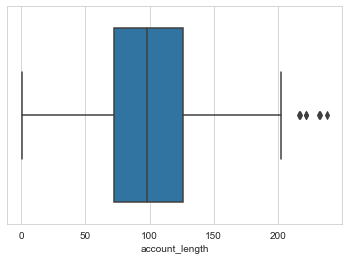

In [54]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.account_length)

In [55]:
dados_featureSelection.account_length.sort_values(ascending = False).head(10)

927     238
1062    233
1056    232
1465    222
1046    222
1296    217
1009    216
1536    202
985     201
1343    200
Name: account_length, dtype: int64

<AxesSubplot:xlabel='number_customer_service_calls'>

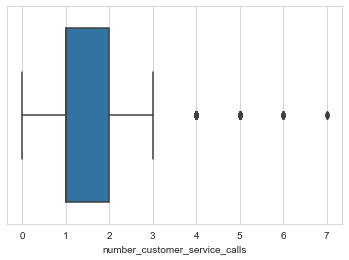

In [56]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.number_customer_service_calls)

In [57]:
dados_featureSelection.number_customer_service_calls.sort_values(ascending = False).head(130)

982     7
974     7
1073    7
752     7
1204    6
       ..
1092    4
274     4
1365    4
71      4
514     4
Name: number_customer_service_calls, Length: 130, dtype: int64

<AxesSubplot:xlabel='total_charge'>

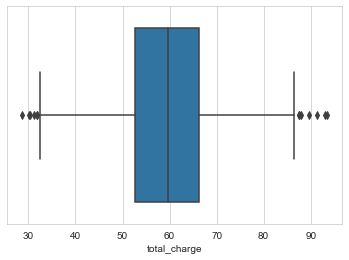

In [58]:
# Boxplot para avaliar atributo que aparenta ter o maior numero de outliers
sns.boxplot(dados_featureSelection.total_charge)

In [59]:
dados_featureSelection.total_charge.sort_values(ascending = False).head(10)

109     93.39
660     92.96
1143    91.40
974     89.70
857     87.92
153     87.55
2       87.48
323     86.37
232     86.23
1658    85.79
Name: total_charge, dtype: float64

In [60]:
dados_featureSelection.total_charge.sort_values(ascending = True).head(15)

605     28.74
442     30.14
446     30.43
1648    31.16
1219    31.74
904     31.83
525     32.58
1481    32.74
1357    32.78
1636    33.76
1540    33.99
368     34.21
60      34.45
422     35.83
1123    35.86
Name: total_charge, dtype: float64

Entendo que o atributo **number_vmail_messages** apresenta outliers esperados para a área de negócios.
Os atributos **account_length**, **number_customer_service_calls** e **total_charge** apresentam outliers mais excepcionais que podem impactar a performance do modelo.
Irei tratar em datasets separados para poder avaliar qual o impacto deles.

In [61]:
dados_outlier_1 = dados_featureSelection[dados_featureSelection.account_length <= 202]
dados_outlier_2 = dados_featureSelection[dados_featureSelection.number_customer_service_calls <= 3]
dados_outlier_3 = dados_featureSelection[dados_featureSelection.total_charge <= 85]
dados_outlier_3 = dados_outlier_3[dados_outlier_3.total_charge >= 35]

In [62]:
# Cria um objeto separado para a variável target
y1 = dados_outlier_1.Target
# Cria um objeto separadado para as variáveis de entrada
X1 = dados_outlier_1.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X1_treino, X1_teste, y1_treino, y1_teste = train_test_split(X1, 
                                                        y1, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_outlier_1.Target)
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X1_treino, y1_treino = over_sampler.fit_resample(X1_treino, y1_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X1_treino)
X1_treino = scaler.transform(X1_treino)
X1_teste = scaler.transform(X1_teste)

In [63]:
# Cria um objeto separado para a variável target
y2 = dados_outlier_2.Target
# Cria um objeto separadado para as variáveis de entrada
X2 = dados_outlier_2.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, 
                                                        y2, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_outlier_2.Target)
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X2_treino, y2_treino = over_sampler.fit_resample(X2_treino, y2_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X2_treino)
X2_treino = scaler.transform(X2_treino)
X2_teste = scaler.transform(X2_teste)

In [64]:
# Cria um objeto separado para a variável target
y3 = dados_outlier_3.Target
# Cria um objeto separadado para as variáveis de entrada
X3 = dados_outlier_3.drop('Target', axis = 1)
# Split em dados de treino e teste com amostragem estratificada
X3_treino, X3_teste, y3_treino, y3_teste = train_test_split(X3, 
                                                        y3, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados_outlier_3.Target)
#Aplica a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)
X3_treino, y3_treino = over_sampler.fit_resample(X3_treino, y3_treino)
#Aplicar a técnica de padronização dos dados
scaler = StandardScaler()
scaler.fit(X3_treino)
X3_treino = scaler.transform(X3_treino)
X3_teste = scaler.transform(X3_teste)

## Criando novas versões do Modelo

### Otimizando RandomForest

In [65]:
tuned_params_v2_2_1 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_1 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_1.fit(X1_treino, y1_treino)
modelo_v2_2_1.best_estimator_

RandomForestClassifier(n_estimators=200)

In [66]:
modelo_v2_2_1 = RandomForestClassifier()
modelo_v2_2_1.fit(X1_treino, y1_treino)
y_pred_v2_2_1 = modelo_v2_2_1.predict(X1_teste)
y_pred_proba_v2_2_1 = modelo_v2_2_1.predict_proba(X1_teste)[:, 1]
fpr_v2_2_1, tpr_v2_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v2_2_1)
auc_v2_2_1 = auc(fpr_v2_2_1, tpr_v2_2_1)
acuracia_v2_2_1 = accuracy_score(y1_teste, y_pred_v2_2_1)
dict_modelo_v2_2_1 = {'Nome': 'modelo_v2_2_1', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_1,
                  'Acurácia': acuracia_v2_2_1}
df_modelos = df_modelos.append(dict_modelo_v2_2_1, ignore_index = True)

In [67]:
tuned_params_v2_2_2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_2.fit(X2_treino, y2_treino)
modelo_v2_2_2.best_estimator_

RandomForestClassifier(n_estimators=500)

In [68]:
modelo_v2_2_2 = RandomForestClassifier(n_estimators = 500)
modelo_v2_2_2.fit(X2_treino, y2_treino)
y_pred_v2_2_2 = modelo_v2_2_2.predict(X2_teste)
y_pred_proba_v2_2_2 = modelo_v2_2_2.predict_proba(X2_teste)[:, 1]
fpr_v2_2_2, tpr_v2_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v2_2_2)
auc_v2_2_2 = auc(fpr_v2_2_2, tpr_v2_2_2)
acuracia_v2_2_2 = accuracy_score(y2_teste, y_pred_v2_2_2)
dict_modelo_v2_2_2 = {'Nome': 'modelo_v2_2_2', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_2,
                  'Acurácia': acuracia_v2_2_2}
df_modelos = df_modelos.append(dict_modelo_v2_2_2, ignore_index = True)

In [69]:
tuned_params_v2_2_3 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}
modelo_v2_2_3 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2_2_3, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)
modelo_v2_2_3.fit(X3_treino, y3_treino)
modelo_v2_2_3.best_estimator_

RandomForestClassifier(min_samples_split=5)

In [70]:
modelo_v2_2_3 = RandomForestClassifier(n_estimators = 500)
modelo_v2_2_3.fit(X3_treino, y3_treino)
y_pred_v2_2_3 = modelo_v2_2_3.predict(X3_teste)
y_pred_proba_v2_2_3 = modelo_v2_2_3.predict_proba(X3_teste)[:, 1]
fpr_v2_2_3, tpr_v2_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v2_2_3)
auc_v2_2_3 = auc(fpr_v2_2_3, tpr_v2_2_3)
acuracia_v2_2_3 = accuracy_score(y3_teste, y_pred_v2_2_3)
dict_modelo_v2_2_3 = {'Nome': 'modelo_v2_2_3', 
                  'Algoritmo': 'Random Forest',
                  'AUC Score': auc_v2_2_3,
                  'Acurácia': acuracia_v2_2_3}
df_modelos = df_modelos.append(dict_modelo_v2_2_3, ignore_index = True)

### Otimizando DecisionTree

In [71]:
tuned_params_v4_2_1 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_1 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_1, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_1.fit(X1_treino, y1_treino)
modelo_v4_2_1.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_split=7)

In [72]:
modelo_v4_2_1 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=3, min_samples_split=5)
modelo_v4_2_1.fit(X1_treino, y1_treino)
y_pred_v4_2_1 = modelo_v4_2_1.predict(X1_teste)
y_pred_proba_v4_2_1 = modelo_v4_2_1.predict_proba(X1_teste)[:, 1]
fpr_v4_2_1, tpr_v4_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v4_2_1)
auc_v4_2_1 = auc(fpr_v4_2_1, tpr_v4_2_1)
acuracia_v4_2_1 = accuracy_score(y1_teste, y_pred_v4_2_1)
dict_modelo_v4_2_1 = {'Nome': 'modelo_v4_2_1', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_1,
                  'Acurácia': acuracia_v4_2_1}
df_modelos = df_modelos.append(dict_modelo_v4_2_1, ignore_index = True)

In [73]:
tuned_params_v4_2_2 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_2 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_2.fit(X2_treino, y2_treino)
modelo_v4_2_2.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=5)

In [74]:
modelo_v4_2_2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=7)
modelo_v4_2_2.fit(X2_treino, y2_treino)
y_pred_v4_2_2 = modelo_v4_2_2.predict(X2_teste)
y_pred_proba_v4_2_2 = modelo_v4_2_2.predict_proba(X2_teste)[:, 1]
fpr_v4_2_2, tpr_v4_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v4_2_2)
auc_v4_2_2 = auc(fpr_v4_2_2, tpr_v4_2_2)
acuracia_v4_2_2 = accuracy_score(y2_teste, y_pred_v4_2_2)
dict_modelo_v4_2_2 = {'Nome': 'modelo_v4_2_2', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_2,
                  'Acurácia': acuracia_v4_2_2}
df_modelos = df_modelos.append(dict_modelo_v4_2_2, ignore_index = True)

In [75]:
tuned_params_v4_2_3 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}
modelo_v4_2_3 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4_2_3, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)
modelo_v4_2_3.fit(X3_treino, y3_treino)
modelo_v4_2_3.best_estimator_

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=3)

In [76]:
modelo_v4_2_3 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=5)
modelo_v4_2_3.fit(X3_treino, y3_treino)
y_pred_v4_2_3 = modelo_v4_2_3.predict(X3_teste)
y_pred_proba_v4_2_3 = modelo_v4_2_3.predict_proba(X3_teste)[:, 1]
fpr_v4_2_3, tpr_v4_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v4_2_3)
auc_v4_2_3 = auc(fpr_v4_2_3, tpr_v4_2_3)
acuracia_v4_2_3 = accuracy_score(y3_teste, y_pred_v4_2_3)
dict_modelo_v4_2_3 = {'Nome': 'modelo_v4_2_3', 
                  'Algoritmo': 'Decision Tree',
                  'AUC Score': auc_v4_2_3,
                  'Acurácia': acuracia_v4_2_3}
df_modelos = df_modelos.append(dict_modelo_v4_2_3, ignore_index = True)

### Otimizando XGBoost

In [77]:
param_grid = { 
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    "max_depth": range(3,21,3),
    "gamma": [i/10.0 for i in range(0,5)],
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
scoring = ['roc_auc']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
xgboost = XGBClassifier(seed=0).fit(X1_treino,y1_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X1_treino, y1_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=12, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
modelo_v6_2_1 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_1.fit(X1_treino, y1_treino)
y_pred_v6_2_1 = modelo_v6_2_1.predict(X1_teste)
y_pred_proba_v6_2_1 = modelo_v6_2_1.predict_proba(X1_teste)[:, 1]
fpr_v6_2_1, tpr_v6_2_1, thresholds = roc_curve(y1_teste, y_pred_proba_v6_2_1)
auc_v6_2_1 = auc(fpr_v6_2_1, tpr_v6_2_1)
acuracia_v6_2_1 = accuracy_score(y1_teste, y_pred_v6_2_1)
dict_modelo_v6_2_1 = {'Nome': 'modelo_v6_2_1', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_1,
                  'Acurácia': acuracia_v6_2_1}
df_modelos = df_modelos.append(dict_modelo_v6_2_1, ignore_index = True)

In [79]:
xgboost = XGBClassifier(seed=0).fit(X2_treino,y2_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X2_treino, y2_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [80]:
modelo_v6_2_2 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_2.fit(X2_treino, y2_treino)
y_pred_v6_2_2 = modelo_v6_2_2.predict(X2_teste)
y_pred_proba_v6_2_2 = modelo_v6_2_2.predict_proba(X2_teste)[:, 1]
fpr_v6_2_2, tpr_v6_2_2, thresholds = roc_curve(y2_teste, y_pred_proba_v6_2_2)
auc_v6_2_2 = auc(fpr_v6_2_2, tpr_v6_2_2)
acuracia_v6_2_2 = accuracy_score(y2_teste, y_pred_v6_2_2)
dict_modelo_v6_2_2 = {'Nome': 'modelo_v6_2_2', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_2,
                  'Acurácia': acuracia_v6_2_2}
df_modelos = df_modelos.append(dict_modelo_v6_2_2, ignore_index = True)

In [81]:
xgboost = XGBClassifier(seed=0).fit(X3_treino,y3_treino)
random_search = RandomizedSearchCV(estimator=xgboost, 
                           param_distributions=param_grid, 
                           n_iter=48,
                           scoring=scoring, 
                           refit='roc_auc', 
                           n_jobs=-1, 
                           cv=kfold, 
                           verbose=0)
random_result = random_search.fit(X3_treino, y3_treino)
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=18, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [82]:
modelo_v6_2_3 = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=1, 
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0)
modelo_v6_2_3.fit(X3_treino, y3_treino)
y_pred_v6_2_3 = modelo_v6_2_3.predict(X3_teste)
y_pred_proba_v6_2_3 = modelo_v6_2_3.predict_proba(X3_teste)[:, 1]
fpr_v6_2_3, tpr_v6_2_3, thresholds = roc_curve(y3_teste, y_pred_proba_v6_2_3)
auc_v6_2_3 = auc(fpr_v6_2_3, tpr_v6_2_3)
acuracia_v6_2_3 = accuracy_score(y3_teste, y_pred_v6_2_3)
dict_modelo_v6_2_3 = {'Nome': 'modelo_v6_2_3', 
                  'Algoritmo': 'XGBoost',
                  'AUC Score': auc_v6_2_3,
                  'Acurácia': acuracia_v6_2_3}
df_modelos = df_modelos.append(dict_modelo_v6_2_3, ignore_index = True)

In [83]:
display(df_modelos)

,Nome,Algoritmo,AUC Score,Acurácia
0,modelo_v1,Regressão Logística,0.799713,0.748201
1,modelo_v2,Random Forest,0.921399,0.937650
2,modelo_v3,KNN,0.859690,0.820144
3,modelo_v4,Decision Tree,0.928942,0.913669
4,modelo_v5,SVM,0.826128,0.860911
5,modelo_v6,XGBoost,0.902948,0.913669
6,modelo_v2_1,Random Forest,0.912075,0.908873
7,modelo_v4_1,Decision Tree,0.888776,0.920863
8,modelo_v6_1,XGBoost,0.895479,0.889688
9,modelo_v2_2_1,Random Forest,0.869578,0.915663


Os novos modelos apresentaram uma pior performance, assim encerro esta etapa e partirei para avaliar qual o melhor modelo a se implementar.

In [84]:
# Me basearei no AUC Score por se tratar de uma métrica global, ideal para comparar modelos de diferentes algoritmos
df_melhor_modelo = df_modelos[df_modelos['AUC Score'] == df_modelos['AUC Score'].max()]
df_melhor_modelo

,Nome,Algoritmo,AUC Score,Acurácia
3,modelo_v4,Decision Tree,0.928942,0.913669


Verifico que os modelos originais apresentam maiores resultados

In [85]:
df_modelos.loc[1:5:2]

,Nome,Algoritmo,AUC Score,Acurácia
1,modelo_v2,Random Forest,0.921399,0.937650
3,modelo_v4,Decision Tree,0.928942,0.913669
5,modelo_v6,XGBoost,0.902948,0.913669


Entre os melhores modelos eu indicaria o **modelo_v4** pois tem a melhor métrica de comparação, mesmo que a acurácia deste modelo seja igual ao **modelo_v6** e até menor que o do **modelo_v2**, pois o score AUC é mais indicado para comparar modelos de algoritmos diferente.

In [86]:
# Salva o modelo em disco
with open('modelo_v4.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v4, 'modelo_v4.pkl') 